In [23]:
import tensorflow as tf 
from tensorflow import keras
import numpy as np 


#https://github.com/zalandoresearch/fashion-mnist
fashion_mnist_data = keras.datasets.fashion_mnist

(train_images,train_label),(test_images,test_label) = fashion_mnist_data.load_data()

print(train_images[37])

[[  0   0   1   1   0   1   0   0   0   0  34  95   0   0   0   0  52  70
    0   0   0   2   1   0   1   0   0   0]
 [  0   0   0   1   1   0   0  11  59 111 113 182 169 226 255 188 175 162
  105  85  31   0   0   0   1   0   0   0]
 [  0   0   1   0   0  27  89 127 127 115 101  86  81  95  91  88  78  92
  115 136 139 126  73   1   0   0   0   0]
 [  0   0   0   0  49 117 113  95  94  97  98 102 101  98  91  97 104  97
  101  92  95 111 128  82   1   0   0   0]
 [  0   0   0  18 118 102  92  92  92  89  94  92  86  85  88  94  92  92
   95  99  95  98  89 126  24   0   0   0]
 [  0   0   0  59 127 102  95  94  97  91  86  91  92  88  86  89  91  99
  102 101  98  94  99 121  57   0   0   0]
 [  0   0   0  95 118 107  98  89  84  86  86  86  89  89  85  85  92  92
   89  89  88  97 107 111  97   0   0   0]
 [  0   0   0 111 126 123 111 102 102  94  91  88  89  91  86  86  95  97
   91  98 104 102 111 102 111   0   0   0]
 [  0   0   0 108 107 117 146 169 111 105  91  91  88  84  88  9

In [24]:
#normalize 
(train_images,test_images) = (train_images/255.0,test_images/255.0)

#model
model = keras.Sequential([keras.layers.Flatten(),
keras.layers.Dense(128 , activation=tf.nn.relu),
keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer= 'adam',
    loss='sparse_categorical_crossentropy')
model.fit(train_images,train_label,epochs=5)


Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 2s 33us/sample - loss: 0.5016
Epoch 2/5
60000/60000 [==============================] - 2s 30us/sample - loss: 0.3797
Epoch 3/5
60000/60000 [==============================] - 2s 31us/sample - loss: 0.3379
Epoch 4/5
60000/60000 [==============================] - 2s 31us/sample - loss: 0.3158
Epoch 5/5
60000/60000 [==============================] - 2s 32us/sample - loss: 0.2979


In [26]:
#evaluate & test the accuracy
model.evaluate(test_images,test_label)

10000/10000 [==============================] - 0s 20us/sample - loss: 0.3795


0.3795405027389526

In [27]:
#need to reshape
(train_images,test_images) = (train_images.reshape(60000,28,28,1),test_images.reshape(10000,28,28,1))
#model
model = keras.Sequential([
    keras.layers.Conv2D(64, (3,3), activation=tf.nn.relu, input_shape = (28,28,1) ),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Conv2D(64, (3,3), activation=tf.nn.relu),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Flatten(),
    keras.layers.Dense(128 , activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
    ])

model.compile(optimizer= 'adam',
    loss='sparse_categorical_crossentropy')
model.fit(train_images,train_label,epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 45s 742us/sample - loss: 0.4375
Epoch 2/5
60000/60000 [==============================] - 49s 815us/sample - loss: 0.2942
Epoch 3/5
60000/60000 [==============================] - 44s 740us/sample - loss: 0.2488
Epoch 4/5
60000/60000 [==============================] - 45s 748us/sample - loss: 0.2180
Epoch 5/5
60000/60000 [==============================] - 45s 754us/sample - loss: 0.1890


In [28]:
model.evaluate(test_images,test_label)

10000/10000 [==============================] - 1s 111us/sample - loss: 0.2609


0.26090587186217307

In [29]:
#visualization the progress
print(test_label[:100])

[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1 4 6 0 9 3 8 8 3 3 8 0 7
 5 7 9 6 1 3 7 6 7 2 1 2 2 4 4 5 8 2 2 8 4 8 0 7 7 8 5 1 1 2 3 9 8 7 0 2 6
 2 3 1 2 8 4 1 8 5 9 5 0 3 2 0 6 5 3 6 7 1 8 0 1 4 2]


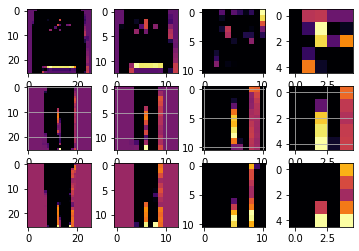

In [39]:
import matplotlib.pyplot as plt 
f,axarr = plt.subplots(3,4)
FirstImage =  1
SecondImage =  2
ThirdImage = 3
CON_NUM = 1

layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input , outputs = layer_outputs )

for x in range(0,4) :
    f1 = activation_model.predict(test_images[FirstImage].reshape(1,28,28,1))[x]
    axarr[0,x].imshow(f1[0, : , : , CON_NUM],cmap = 'inferno')
    axarr[0,x].grid(False)

    f2 = activation_model.predict(test_images[SecondImage].reshape(1,28,28,1))[x]
    axarr[1,x].imshow(f2[0, : , : , CON_NUM],cmap = 'inferno')
    axarr[1,x].grid(True)

    f3 = activation_model.predict(test_images[ThirdImage].reshape(1,28,28,1))[x]
    axarr[2,x].imshow(f3[0, : , : , CON_NUM],cmap = 'inferno')
    axarr[2,x].grid(False)
